In [13]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import requests
# import time

# import api_keys

In [14]:
# import matplotlib.pyplot as plt
# import requests
# import pandas as pd
# import numpy as np
# import time
# from citipy import citipy
# from random import uniform

In [15]:
# from citipy import citipy

In [16]:
# api_key = "2dcb4762f67262ccefb859ef4223abb7"

In [17]:
# api_key

'2dcb4762f67262ccefb859ef4223abb7'

In [18]:
# output_data_file = "output_data/cities.csv"

In [19]:
# api_key

In [20]:
# column_type = ["City", "Country"]

In [21]:
# cities_df = pd.DataFrame(columns = column_type)

In [22]:
# column_names = ["City", "Country"]
# cities_df = pd.DataFrame(columns=column_names)

In [23]:
# for x in range(1750):
#     lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
#     city = citipy.nearest_city(lat, lng)
#     cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

# #Remove duplicate cities
# cities_df = cities_df.drop_duplicates(subset='City').reset_index()
# cities_df.count()

In [24]:
# lat_range = (-90, 90)
# lng_range = (-180, 180)

In [25]:
# lat_lngs = []
# cities = []

In [30]:
# lats = np.random.uniform(low = - 90.000, high = 90.000, size = 1500)
# lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
# lat_lngs = zip(lats, lngs)

In [31]:
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

import json
import requests
import random
import pandas as pd
import numpy as np
import time
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# if city not in cities:
#     cities.append(city)
    
# len(cities)

1

In [26]:

# #Create a df to add all the data from the API calls.
# column_names = ["City", "Country","Temperature (F)",
#                 "Latitude","Longitude","Humidity (%)",
#                 "Cloudiness (%)", "Wind Speed (mph)"]
# clean_cities_df = pd.DataFrame(columns=column_names)

# # Loop through the list of cities and add the data to the df.
# url = "http://api.openweathermap.org/data/2.5/weather?"

# row_count = 1


Beginning Data Retrieval


In [27]:
# clean_cities_df.count()

City                0
Country             0
Temperature (F)     0
Latitude            0
Longitude           0
Humidity (%)        0
Cloudiness (%)      0
Wind Speed (mph)    0
dtype: int64

In [ ]:
# lat_range = (-90, 90)
# lng_range = (-180, 180)

In [ ]:
# lat_lngs = []
# cities = []

In [ ]:
# lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
# lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
# lat_lngs = zip(lats, lngs)
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1].city_name)
    
#     if city not in cities:
#         cities.append(city)
        
#     len(cities)

In [ ]:
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1].city_name)

In [ ]:
# base_url = "http://api.openweathermap.org/data/2.5/weather?"

In [ ]:
# city 

In [ ]:
# city_name = random.choice(city)

In [ ]:
# city_name

In [ ]:
# complete_url = base_url + "appid" + api_key + "&q=" + city_name

In [12]:
# Dependencies


# Import Open Weather Map API key.
# from owm_api_key import api_key

In [13]:
# Declare variables describing the scope of lat/lng search for cities. 
# Lat ranges from -90 to 90. Lng ranges from -180 to 180.
lat = {'min': -90, 'max': 90}
lng = {'min': -180, 'max': 180}

# Create arrays containing increments of lat and long.
lat_values = np.arange(lat['min'], lat['max'], 0.01)
lng_values = np.arange(lng['min'], lng['max'], 0.01)
# Create an empty data frame to city and weather data
column_names = ('city_name', 'country_code', 'rand_lat', 'rand_lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_df = pd.DataFrame(columns = column_names)
cities_df

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [14]:
'''Query Citipy with random lat-long values until we collect our sample, and append weather
data via Open Weather Map API call.''' 

# Set the sample size.
sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

record = 0

# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(cities_df) < sample_size:
    # Choose a random point within our lat-lng domain.
    rand_lat = random.choice(lat_values)
    rand_lng = random.choice(lng_values)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(rand_lat, rand_lng)
    city_name = city.city_name
    country_code = city.country_code
    # Call Open Weather Map API to obtain data and append it to df
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        print('City: %s. %s' % (weather_json['name'], url))
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        # Avoid repeating cities
        if city_name not in cities_df.city_name.values:
            print('Status code: %s. DF length is now: %d' % (str(weather_json["cod"]), len(cities_df)+1))
            # Append data to df columns
            cities_df.set_value(record, "city_name", city_name)
            cities_df.set_value(record, "country_code", country_code)
            cities_df.set_value(record, "rand_lat", rand_lat)
            cities_df.set_value(record, "rand_lng", rand_lng)
            cities_df.set_value(record, "Latitude", latitude)
            cities_df.set_value(record, "Longitude", longitude)
            cities_df.set_value(record, "Temp (F)", temp)
            cities_df.set_value(record, "Humidity (%)", humidity)
            cities_df.set_value(record, "Cloudiness (%)", cloud)
            cities_df.set_value(record, "Wind Speed (mph)", wind)

            record += 1
        
            # Wait between 1-4 seconds before next loop
            time.sleep(random.randint(1, 4))
        else:
            pass
    else:
        pass
    
print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

# Visualize df
cities_df.head()

City: Halifax. http://api.openweathermap.org/data/2.5/weather?q=halifax,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 1


C:\Users\anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\anish\Anaconda3\lib\s

City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 2
City: Sierpc. http://api.openweathermap.org/data/2.5/weather?q=sierpc,pl&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 3
City: Barrow. http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 4
City: Rio Verde de Mato Grosso. http://api.openweathermap.org/data/2.5/weather?q=rio verde de mato grosso,br&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 5
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 6
City: Ostrovnoy. http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef422

City: Grootegast. http://api.openweathermap.org/data/2.5/weather?q=grootegast,nl&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 46
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Khatanga. http://api.openweathermap.org/data/2.5/weather?q=khatanga,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 47
City: Tevriz. http://api.openweathermap.org/data/2.5/weather?q=tevriz,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 48
City: Hamina. http://api.openweathermap.org/data/2.5/weather?q=hamina,fi&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 49
City: Hofn. http://api.openweathermap.org/data/2.5/weather?q=hofn,is&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 50
City: Faanui. http://api.openweat

City: Port Elizabeth. http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 85
City: Bethel. http://api.openweathermap.org/data/2.5/weather?q=bethel,us&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 86
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Bambous Virieux. http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 87
City: Tuktoyaktuk. http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 88
City: Penon Blanco. http://api.openweathermap.org/data/2.5/weather?q=penon blanco,mx&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF len

City: Kruisfontein. http://api.openweathermap.org/data/2.5/weather?q=kruisfontein,za&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 115
City: Narsaq. http://api.openweathermap.org/data/2.5/weather?q=narsaq,gl&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 116
City: Jiaozhou. http://api.openweathermap.org/data/2.5/weather?q=jiaozhou,cn&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 117
City: Saint-Augustin. http://api.openweathermap.org/data/2.5/weather?q=saint-augustin,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 118
City: Guider. http://api.openweathermap.org/data/2.5/weather?q=guider,cm&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Tete. http://api.openweathermap.org/data/2.5/weather?q=tete,mz&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 119
City: Ushu

City: Bindura. http://api.openweathermap.org/data/2.5/weather?q=bindura,zw&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 142
City: Belyy Yar. http://api.openweathermap.org/data/2.5/weather?q=belyy yar,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 143
City: Miraflores. http://api.openweathermap.org/data/2.5/weather?q=miraflores,co&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 144
City: Moose Factory. http://api.openweathermap.org/data/2.5/weather?q=moose factory,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 145
City: Cape Town. http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Tessalit. http://api.openw

City: Bredasdorp. http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Fort Saint James. http://api.openweathermap.org/data/2.5/weather?q=fort saint james,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 169
City: Gimbi. http://api.openweathermap.org/data/2.5/weather?q=gimbi,et&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 170
City: Avarua. http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 171
City: Saint-Philippe. http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: New Norfolk. http://api.openweathermap.org/data/2.5/weather?q=new no

City: Fairbanks. http://api.openweathermap.org/data/2.5/weather?q=fairbanks,us&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 190
City: Isangel. http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 191
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Taoudenni. http://api.openweathermap.org/data/2.5/weather?q=taoudenni,ml&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 192
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Hailar. http://api.openweathermap.org/data/2.5/weather?q=hailar,cn&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 193
City: Talara. http://api.openweathermap.org/data/2.5/wea

City: Bilibino. http://api.openweathermap.org/data/2.5/weather?q=bilibino,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Butaritari. http://api.openweathermap.org/data/2.5/weather?q=butaritari,ki&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Amzya. http://api.openweathermap.org/data/2.5/weather?q=amzya,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 212
City: Port Hawkesbury. http://api.openweathermap.org/data/2.5/weather?q=port hawkesbury,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 213
City: Gold Coast. http://api.openweathermap.org/data/2.5/weather?q=gold coast,au&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 214
City: Lagoa. http://api.openweathermap.org/data/2.5/weather?q=lagoa,pt&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 215
City: Carnarvon. http://api.openweathermap.o

City: Chilca. http://api.openweathermap.org/data/2.5/weather?q=chilca,pe&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 234
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Bredasdorp. http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Padang. http://api.openweathermap.org/data/2.5/weather?q=padang,id&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 235
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=2dcb4762f67262ccefb859ef4223

City: Kidal. http://api.openweathermap.org/data/2.5/weather?q=kidal,ml&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 258
City: Khatanga. http://api.openweathermap.org/data/2.5/weather?q=khatanga,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Sinnamary. http://api.openweathermap.org/data/2.5/weather?q=sinnamary,gf&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 259
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Fuerte Olimpo. http://api.openweathermap.org/data/2.5/weather?q=fuerte olimpo,py&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 260
City: Cape Town. http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Savonlinna. http://api.openweathermap.org/data/2.5/weather?q=savonlinna,fi&units=i

City: Butaritari. http://api.openweathermap.org/data/2.5/weather?q=butaritari,ki&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Sept-Iles. http://api.openweathermap.org/data/2.5/weather?q=sept-iles,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 280
City: Mar del Plata. http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Mahebourg. http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 281
City: Clyde River. http://api.openweathermap.org/data/2.5/weather?q=clyde river,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Cuamba. http://api.openweathermap.org/data/2.5/weather?q=cuamba,mz&units=imperial&APPID=2dcb4762f67262ccef

City: Bunia. http://api.openweathermap.org/data/2.5/weather?q=bunia,cd&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 297
City: Shahe. http://api.openweathermap.org/data/2.5/weather?q=shahe,cn&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 298
City: Barrow. http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Northam. http://api.openweathermap.org/data/2.5/weather?q=northam,au&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 299
City: Peniche. http://api.openweathermap.org/data/2.5/weather?q=peniche,pt&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 300
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alf

City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Lagoa. http://api.openweathermap.org/data/2.5/weather?q=lagoa,pt&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Pemba. http://api.openweathermap.org/data/2.5/weather?q=pemba,mz&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 317
City: Ilulissat. http://api.openweathermap.org/data/2.5/weather?q=ilulissat,gl&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Yuancheng. http://api.openweathermap.org/data/2.5/weather?q=yuancheng,cn&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 318
City: Kalmunai. http://api.openweathermap.org/data/2.5/weather?q=kalmunai,lk&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 319
City: Hovd. http://api.openweathermap.org/data/2.5/weather?q=hovd,mn&units=imperial&APPID=2dcb4762f6

City: Vestmannaeyjar. http://api.openweathermap.org/data/2.5/weather?q=vestmannaeyjar,is&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 334
City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Linjiang. http://api.openweathermap.org/data/2.5/weather?q=linjiang,cn&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 335
City: Port Blair. http://api.openweathermap.org/data/2.5/weather?q=port blair,in&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Nanortalik. http://api.openweathermap.org/data/2.5/weather?q=nanortalik,gl&units=imperial&APPID=2dcb4762f67262ccefb8

City: Veraval. http://api.openweathermap.org/data/2.5/weather?q=veraval,in&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 351
City: Hithadhoo. http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Portland. http://api.openweathermap.org/data/2.5/weather?q=portland,au&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Victoria. http://api.openweathermap.org/data/2.5/weather?q=victoria,sc&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Sungairaya. http://api.openweathermap.org/data/2.5/weather?q=sungairaya,id&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 352
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Howard Springs. http://api.openweathermap.org/data/2.5/weather?q=howard springs,au&units=imperial&APPID=2dcb4762f67262ccefb859

City: Khromtau. http://api.openweathermap.org/data/2.5/weather?q=khromtau,kz&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 368
City: Silver City. http://api.openweathermap.org/data/2.5/weather?q=silver city,us&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 369
City: Praia. http://api.openweathermap.org/data/2.5/weather?q=praia,cv&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Ust-Nera. http://api.openweathermap.org/data/2.5/weather?q=ust-nera,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 370
City: Severo-Kurilsk. http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imper

City: Plettenberg Bay. http://api.openweathermap.org/data/2.5/weather?q=plettenberg bay,za&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 389
City: Walvis Bay. http://api.openweathermap.org/data/2.5/weather?q=walvis bay,na&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 390
City: New Norfolk. http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Hobart. http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Clyde River. http://api.openweathermap.org/data/2.5/weather?q=clyde river,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Ola. http://api.openweathermap.org/data/2.5/weather?q=ola,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 391
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&uni

City: Deputatskiy. http://api.openweathermap.org/data/2.5/weather?q=deputatskiy,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 407
City: Shubarkuduk. http://api.openweathermap.org/data/2.5/weather?q=shubarkuduk,kz&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 408
City: Avarua. http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Kodiak. http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Arraial do Cabo. http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: East London. http://api.openweathermap.org/data/2.5/weather?q=east london,za&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Wawa. http://api.openweathermap.org/data/2.5/weather?q=wawa,ca&units=imperial&APPID=2dcb4762f67262ccefb8

City: Carauari. http://api.openweathermap.org/data/2.5/weather?q=carauari,br&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 426
City: Petropavlovsk-Kamchatskiy. http://api.openweathermap.org/data/2.5/weather?q=petropavlovsk-kamchatskiy,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 427
City: Santa Vitoria do Palmar. http://api.openweathermap.org/data/2.5/weather?q=santa vitoria do palmar,br&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 428
City: Nikolskoye. http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Yar-Sale. http://api.openweathermap.org/data/2.5/weather?q=yar-sale,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Huiloapan. http://api.openweathermap.org/data/2.5/weather?q=huiloapan,mx&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF len

City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Saskylakh. http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Bontang. http://api.openweathermap.org/data/2.5/weather?q=bontang,id&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 445
City: Yelizovo. http://api.openweathermap.org/data/2.5/weather?q=yelizovo,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 446
City: Methven. http://api.openweathermap.org/data/2.5/weather?q=methven,nz&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 447
City: Kumluca. http://api.openweathermap.org/data/2.5/weather?q=kumluca,tr&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 448
City: Provideniya. http://api.openweathermap.org/data/2.5/we

City: Torbay. http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Lompoc. http://api.openweathermap.org/data/2.5/weather?q=lompoc,us&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Dunedin. http://api.openweathermap.org/data/2.5/weather?q=dunedin,nz&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Oranjestad. http://api.openweathermap.org/data/2.5/weather?q=oranjestad,aw&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 462
City: Antofagasta. http://api.openweathermap.org/data/2.5/weather?q=antofagasta,cl&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 463
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=2dcb4762f67262ccefb859ef4223ab

City: Maceio. http://api.openweathermap.org/data/2.5/weather?q=maceio,br&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Khatanga. http://api.openweathermap.org/data/2.5/weather?q=khatanga,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Mustasaari. http://api.openweathermap.org/data/2.5/weather?q=mustasaari,fi&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 480
City: Norman Wells. http://api.openweathermap.org/data/2.5/weather?q=norman wells,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: New Norfolk. http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Hilo. http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Saldanha. http://api.openweatherm

City: Nikolskoye. http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Tuktoyaktuk. http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Hithadhoo. http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
City: Banda Aceh. http://api.openweathermap.org/data/2.5/weather?q=banda aceh,id&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 497
City: Jumla. http://api.openweathermap.org/data/2.5/weather?q=jumla,np&units=imperial&APPID=2dcb4762f67262ccefb859ef4223abb7
Status code: 200. DF length is now: 498

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,halifax,ca,41.11,-61.43,44.65,-63.58,29.64,63,75,16.11
1,rikitea,pf,-51.23,-136.15,-23.12,-134.97,78.6,100,44,13
2,sierpc,pl,52.77,19.99,52.85,19.67,45.3,93,92,17.47
3,barrow,us,89.84,-150.8,39.51,-90.4,20.37,78,90,16.11
4,rio verde de mato grosso,br,-18.87,-54.36,-18.92,-54.84,83.96,87,36,1.36


In [ ]:
# , , s = * 10,
#            marker = "o", facecolors = "red", edgecolors = "black", alpha = 0.5, label = "Urban")

In [15]:
type(cities_df)

pandas.core.frame.DataFrame

In [ ]:
# (avg_urban_city_fare, total_urban_city_rides, s = total_urban_city_drivers * 10,
#            marker = "o", facecolors = "red", edgecolors = "black", alpha = 0.5, label = "Urban")


In [ ]:
#scatterplot

In [ ]:
#latitude v temperature plot

In [ ]:
#latitude v humidity plot

In [ ]:
#latitude v cloudiness plot

In [16]:
#city latitude v windspeed(08/22/18)

In [17]:
len(cities_df)

500

In [ ]:
# # Save the DataFrame as a csv
# cities_df.to_csv("Output/weatherpy_data.csv", encoding="utf-8", index=False)

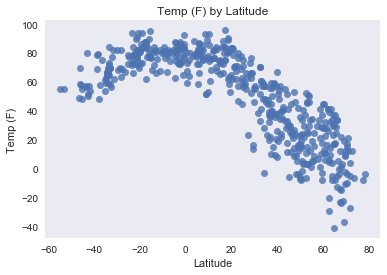

In [29]:
# Build a scatter plot City Latitude vs. Temperature
sns.set_style('ticks')
sns.set(style="dark")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Temp (F)", data=cities_df, fit_reg=False).set_title('Temp (F) by Latitude')

# Save the figure

# Show plot
plt.show()

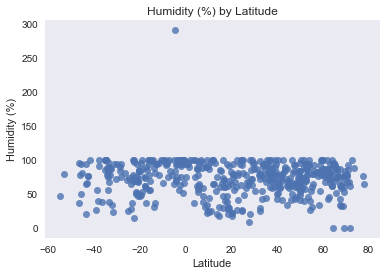

In [28]:
# Build a scatter plot City Latitude vs. Humidity
sns.set_style('ticks')
sns.set(style="dark")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Humidity (%)", data=cities_df, fit_reg=False).set_title('Humidity (%) by Latitude')

# Save the figure


# Show plot
plt.show()

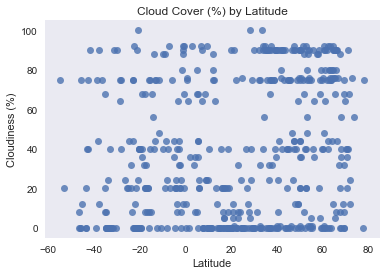

In [27]:
# Build a scatter plot City Latitude vs. Cloudiness
sns.set_style('ticks')
sns.set(style="dark")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Cloudiness (%)", data=cities_df, fit_reg=False).set_title('Cloud Cover (%) by Latitude')



# Show plot
plt.show()

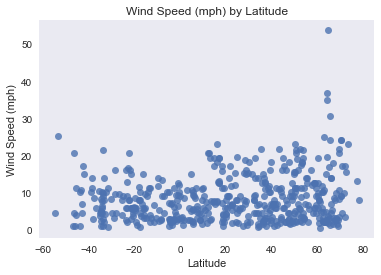

In [25]:
# Build a scatter plot City Latitude vs. Wind Speed
sns.set_style('ticks')
sns.set(style="dark")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Wind Speed (mph)", data=cities_df, fit_reg=False).set_title('Wind Speed (mph) by Latitude')

# Save the figure

# Show plot
plt.show()